<a href="https://colab.research.google.com/github/swapnalisingh13/Group_ProjectML/blob/main/HeartDisiase_Forecasting_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=dabd7bfd69092543a121c89e55289c6225bacb23efecdfd1c4fadd7a5f3b8d9a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.5 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
#EDA
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import sweetviz as sv
#Scaling
from sklearn.preprocessing import StandardScaler
#Warning
import warnings
warnings.filterwarnings('ignore')
#Statistical test
from scipy.stats import chi2_contingency
#Model building and models used
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
#Model metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [5]:
df=pd.read_csv('/content/Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


### Information about dataset

In [ ]:
df.shape

(270, 14)

In [ ]:
for c in df.columns:
    uq = df[c].unique()
    print('Unique values in ',c,':')
    print(uq)

Unique values in  Age :
[70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
Unique values in  Sex :
[1 0]
Unique values in  Chest pain type :
[4 3 2 1]
Unique values in  BP :
[130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
Unique values in  Cholesterol :
[322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### Missing values

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### Column conversions

Categorical to Numerical

In [6]:
#replace and mapping method
mapping = {'Presence': 1, 'Absence': 0}
df['Heart Disease'] = df['Heart Disease'].replace(mapping)

In [ ]:
df['Heart Disease']

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

### Outliers Detection

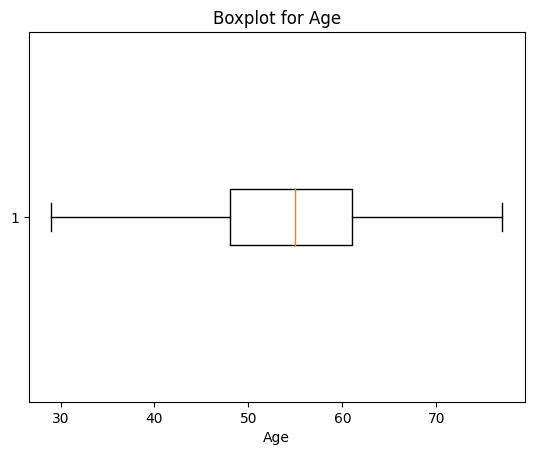

In [ ]:
plt.boxplot(df['Age'], vert=False)
plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.show()

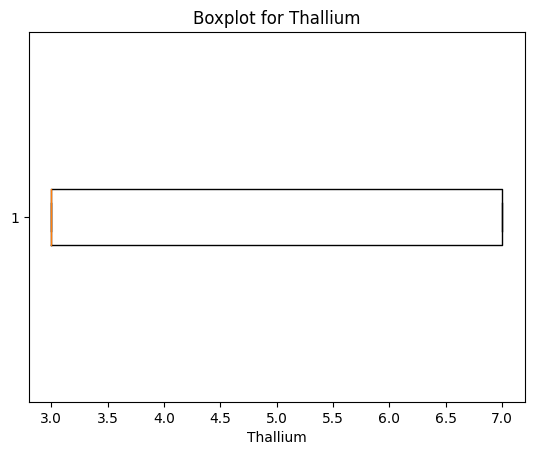

In [ ]:
plt.boxplot(df['Thallium'], vert=False)
plt.title('Boxplot for Thallium')
plt.xlabel('Thallium')
plt.show()

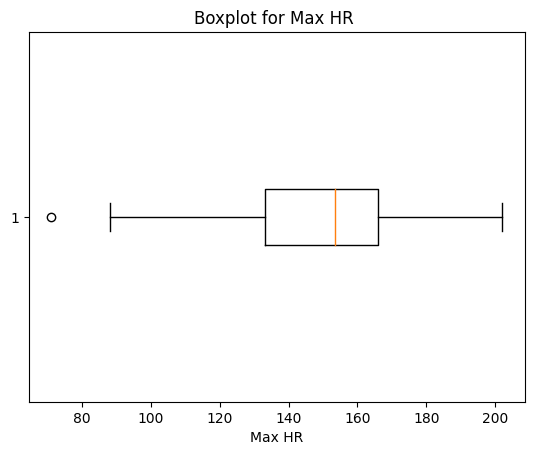

In [ ]:
plt.boxplot(df['Max HR'], vert=False)
plt.title('Boxplot for Max HR ')
plt.xlabel('Max HR')
plt.show()

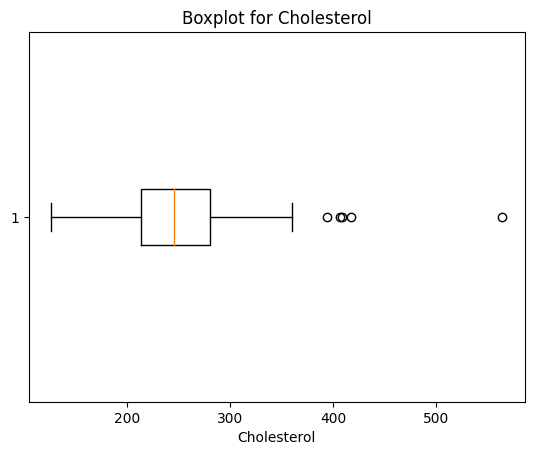

In [ ]:
plt.boxplot(df['Cholesterol'], vert=False)
plt.title('Boxplot for Cholesterol')
plt.xlabel('Cholesterol')
plt.show()

### Removing outliers

In [7]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
df = df[(df['Cholesterol'] >= lb) & (df['Cholesterol'] <= ub)]
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
5     65    1                4  120          177             0            0   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [8]:
df.shape

(265, 14)

### **EDA**

In [ ]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

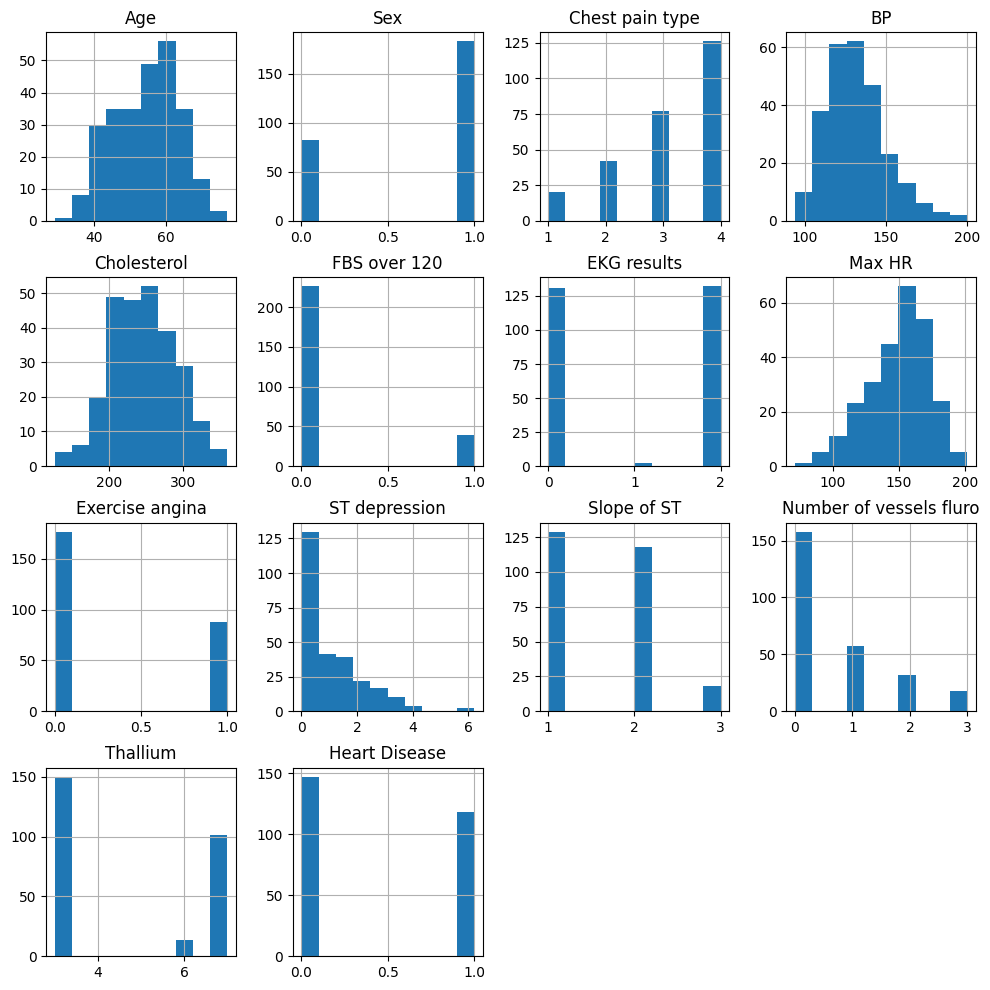

In [ ]:
df.hist(figsize=(12,12))
plt.show()

In [ ]:
report = sv.analyze(df)
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


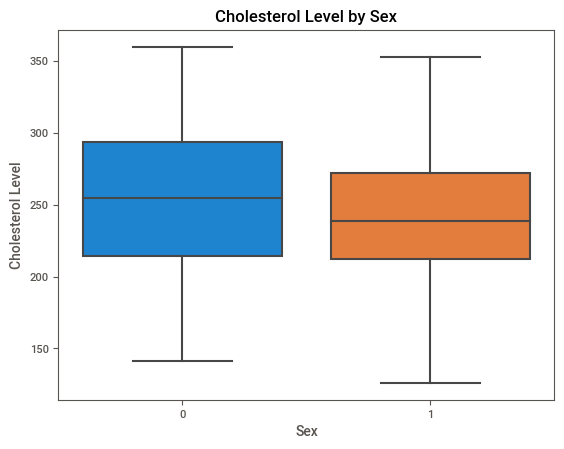

In [ ]:
sns.boxplot(x='Sex', y='Cholesterol', data=df)
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol Level by Sex')
plt.show()

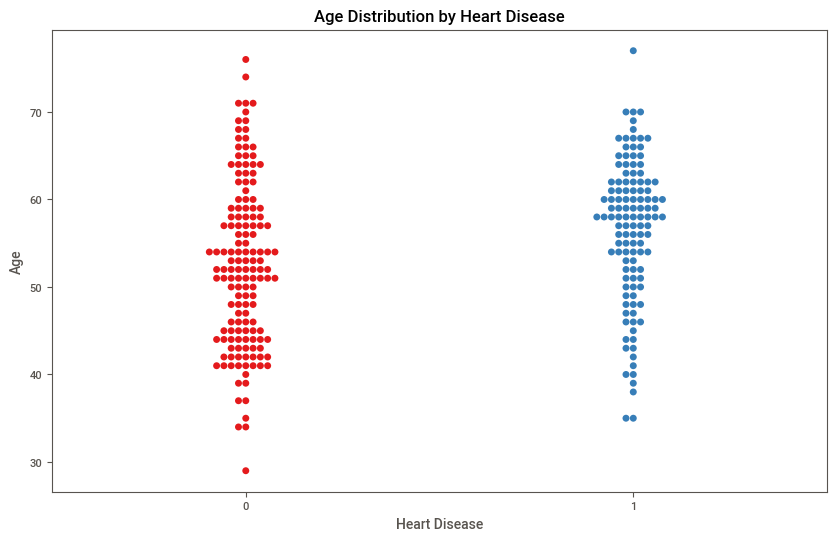

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Heart Disease', y='Age', data=df, palette='Set1')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease')
plt.show()

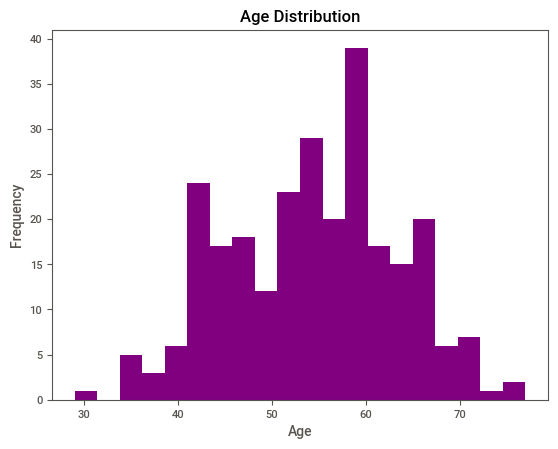

In [ ]:
plt.hist(df['Age'], bins=20, color='purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [ ]:
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])

total_count = len(df)
percentage_female = (countFemale / total_count) * 100
percentage_male = (countMale / total_count) * 100

print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(df.Sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(df.Sex))*100))

Percentage of Female Patients:30.94%
Percentage of Male Patients:69.06%


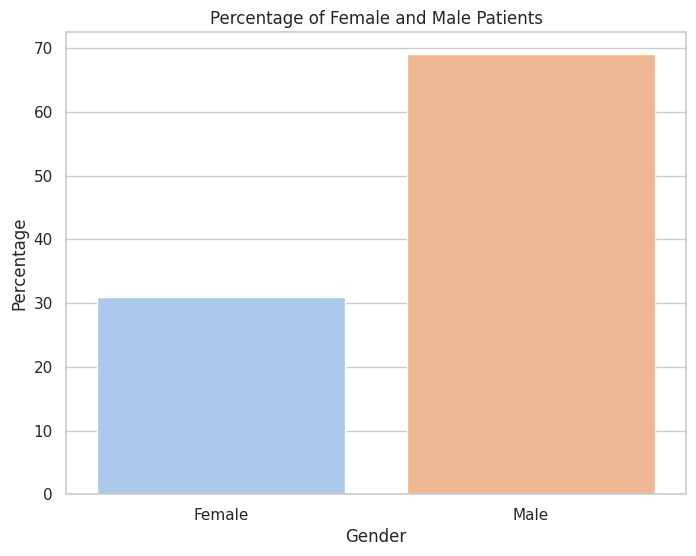

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=['Female', 'Male'], y=[percentage_female, percentage_male], palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Female and Male Patients')
plt.show()

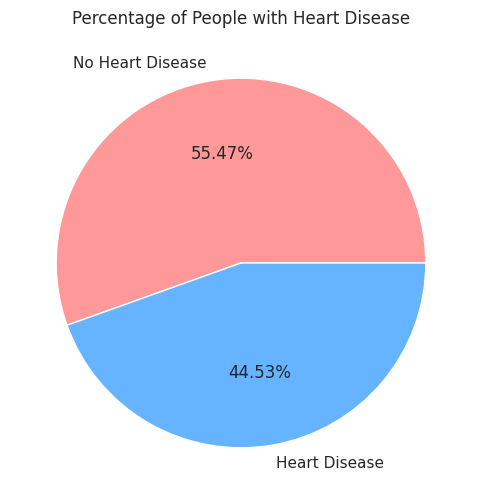

In [ ]:
counts =df['Heart Disease'].value_counts()
l =['No Heart Disease', 'Heart Disease']
sizes =counts.values
plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=l, autopct='%2.2f%%', colors=colors)
plt.title('Percentage of People with Heart Disease')
plt.show()

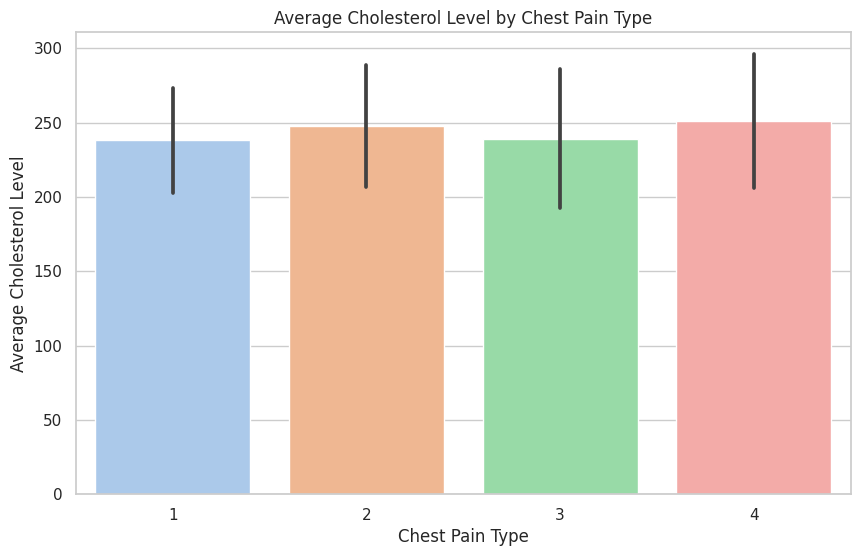

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Chest pain type', y='Cholesterol', data=df, ci="sd", palette='pastel')
plt.xlabel('Chest Pain Type')
plt.ylabel('Average Cholesterol Level')
plt.title('Average Cholesterol Level by Chest Pain Type')
plt.show()

<Axes: >

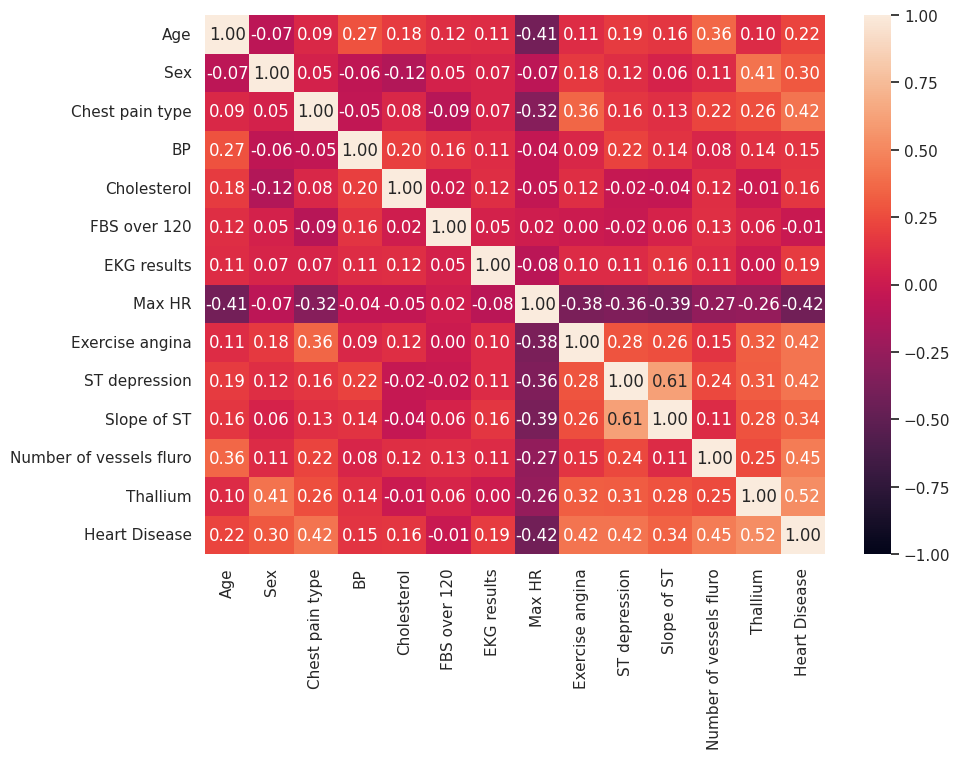

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1,fmt=".2f")

<Axes: >

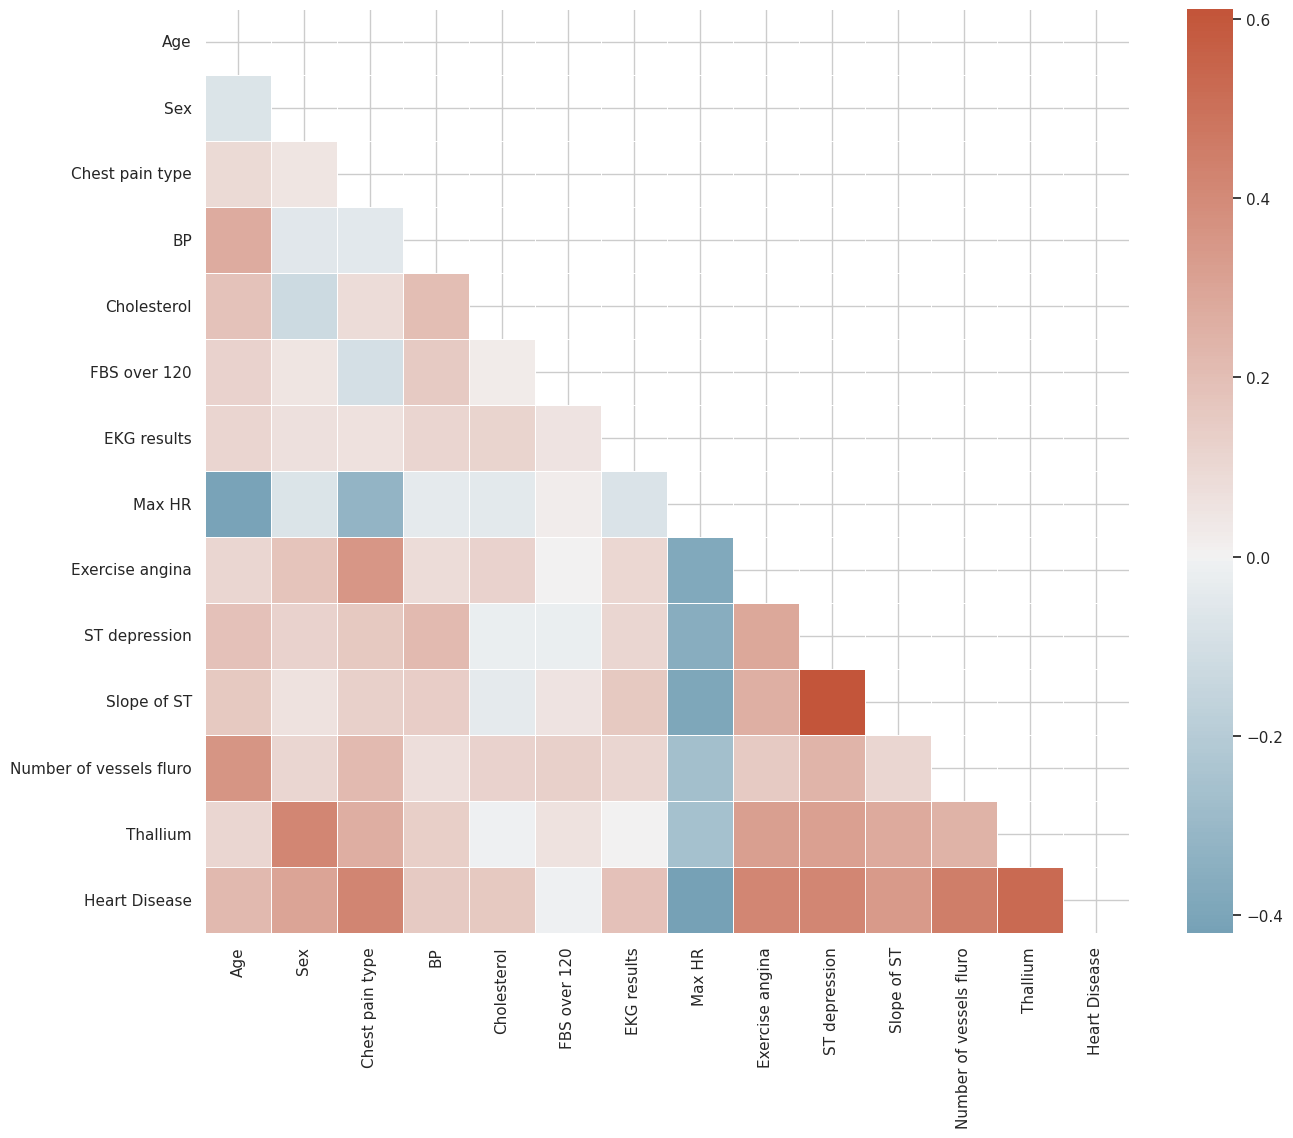

In [ ]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0


### Chi-Square Test

In [9]:
contingency_table = pd.crosstab(df['Thallium'], df['Heart Disease'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
alpha = 0.05
if p < alpha:
    print("H1: Reject the null hypothesis.")
    print("There is a significant association between 'Thallium' and 'Heart Disease'.")
else:
    print("HO: Fail to reject the null hypothesis")
    print(" There is no significant association between 'Thallium' and 'Heart Disease'.")

Chi-Square Statistic: 72.83628274746239
p-value: 1.526870344784579e-16
H1: Reject the null hypothesis.
There is a significant association between 'Thallium' and 'Heart Disease'.


In [10]:
contingency_table = pd.crosstab(df['Chest pain type'], df['Heart Disease'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
alpha = 0.05
if p < alpha:
    print("H1: Reject the null hypothesis.")
    print("There is a significant association between 'Chest pain type' and 'Heart Disease'.")
else:
    print("HO: Fail to reject the null hypothesis")
    print(" There is no significant association between 'Chest pain type' and 'Heart Disease'.")

Chi-Square Statistic: 66.7659615084814
p-value: 2.1015406909696964e-14
H1: Reject the null hypothesis.
There is a significant association between 'Chest pain type' and 'Heart Disease'.


## Models Building

### Segregation of data

In [11]:
y = df["Heart Disease"]
X = df.drop('Heart Disease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [12]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 97, 0: 115})

### Scaling the data

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic regression

In [14]:
M1 = 'Logistic Regression'
l1 = LogisticRegression()
model = l1.fit(X_train, y_train)
l1_predict = l1.predict(X_test)
l1_conf_matrix = confusion_matrix(y_test, l1_predict)
l1_acc_score = accuracy_score(y_test, l1_predict)
print("confussion matrix")
print(l1_conf_matrix)
print("\n")
print(classification_report(y_test,l1_predict))
print("Accuracy of Logistic Regression:",l1_acc_score*100,'\n')

confussion matrix
[[29  3]
 [ 5 16]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.84      0.76      0.80        21

    accuracy                           0.85        53
   macro avg       0.85      0.83      0.84        53
weighted avg       0.85      0.85      0.85        53

Accuracy of Logistic Regression: 84.90566037735849 



### Decision Tree Classifier

### By Entropy

In [15]:
M21 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print(classification_report(y_test,dt_predicted))
print("Accuracy of DecisionTreeClassifier(Entropy):",dt_acc_score*100,'\n')

confussion matrix
[[28  4]
 [ 6 15]]


              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.79      0.71      0.75        21

    accuracy                           0.81        53
   macro avg       0.81      0.79      0.80        53
weighted avg       0.81      0.81      0.81        53

Accuracy of DecisionTreeClassifier(Entropy): 81.13207547169812 



### By Gini

In [16]:
M22 = 'DecisionTreeClassifier'
dtg = DecisionTreeClassifier(criterion = 'gini',random_state=0,max_depth = 6)
dtg.fit(X_train, y_train)
dtg_predicted = dtg.predict(X_test)
dtg_conf_matrix = confusion_matrix(y_test, dtg_predicted)
dtg_acc_score = accuracy_score(y_test, dtg_predicted)
print("confussion matrix")
print(dtg_conf_matrix)
print("\n")
print(classification_report(y_test,dtg_predicted))
print("Accuracy of DecisionTreeClassifier(Gini):",dtg_acc_score*100,'\n')

confussion matrix
[[28  4]
 [ 3 18]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.82      0.86      0.84        21

    accuracy                           0.87        53
   macro avg       0.86      0.87      0.86        53
weighted avg       0.87      0.87      0.87        53

Accuracy of DecisionTreeClassifier(Gini): 86.79245283018868 



### Extreme-Gradient Boost

In [17]:
M3 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=70, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print(classification_report(y_test,xgb_predicted))
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')

confussion matrix
[[32  0]
 [ 7 14]]


              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.67      0.80        21

    accuracy                           0.87        53
   macro avg       0.91      0.83      0.85        53
weighted avg       0.89      0.87      0.86        53

Accuracy of Extreme Gradient Boost: 86.79245283018868 



In [20]:
#Neural Network
NNmodel = Sequential()
NNmodel.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
NNmodel.add(Dense(units=1, activation='sigmoid'))
NNmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NNmodel.fit(X_train, y_train, epochs=10, batch_size=32)
y_pred = NNmodel.predict(X_test)
y_pred = (y_pred > 0.5)
nerural_conf_matrix = confusion_matrix(y_test, y_pred)
NN_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(nerural_conf_matrix,'\n')
print(classification_report(y_test,y_pred))
print("Accuracy of Neural Network:",NN_acc_score*100,'\n')

Epoch 1/10
7/7 [==============================] - 1s 7ms/step - loss: 0.6365 - accuracy: 0.6226
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5776 - accuracy: 0.7358
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.7877
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.8113
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4632 - accuracy: 0.8113
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.8208
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4199 - accuracy: 0.8255
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4041 - accuracy: 0.8255
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3906 - accuracy: 0.8396
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
confussion matrix
[[31  1]
 [ 7 14]] 

              precision    recall 

## Comparisons of Different models

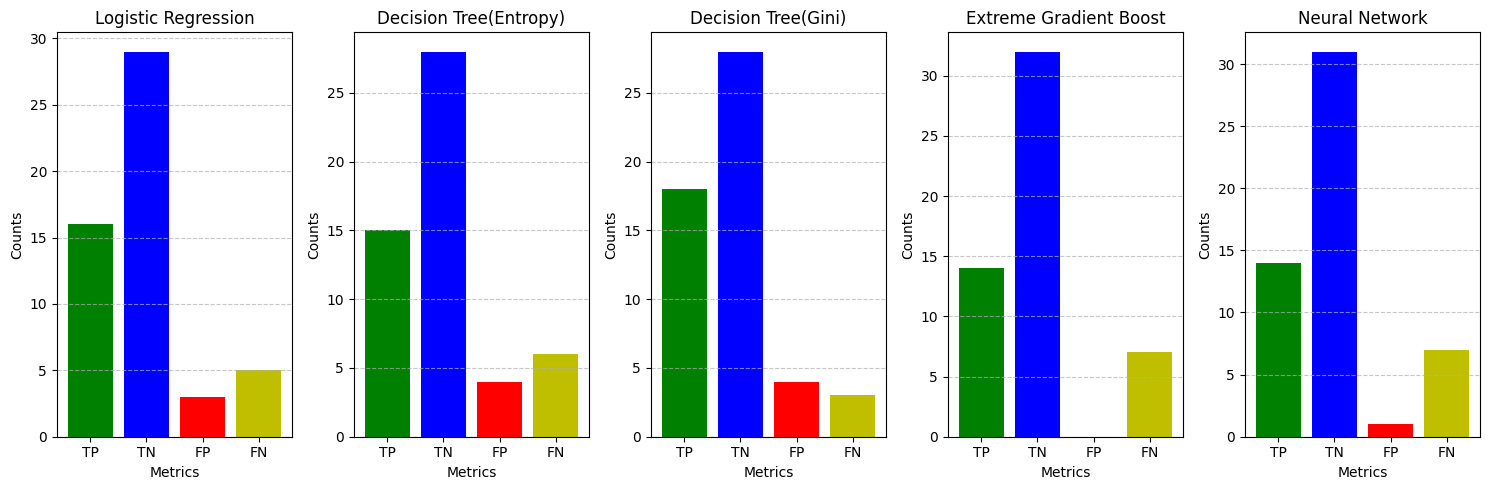

In [21]:
model_names = ['Logistic Regression', 'Decision Tree(Entropy)', 'Decision Tree(Gini)', 'Extreme Gradient Boost', 'Neural Network']
confusion_matrices = [l1_conf_matrix, dt_conf_matrix, dtg_conf_matrix, xgb_conf_matrix, nerural_conf_matrix]

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes.ravel()):
    conf_matrix = confusion_matrices[i]
    model_name = model_names[i]

    tp = conf_matrix[1, 1]
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]

    data = np.array([tp, tn, fp, fn])
    labels = ['TP', 'TN', 'FP', 'FN']

    ax.bar(labels, data, color=['g', 'b', 'r', 'y'])
    ax.set_title(model_name)
    ax.set_ylabel('Counts')
    ax.set_xlabel('Metrics')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Important Features

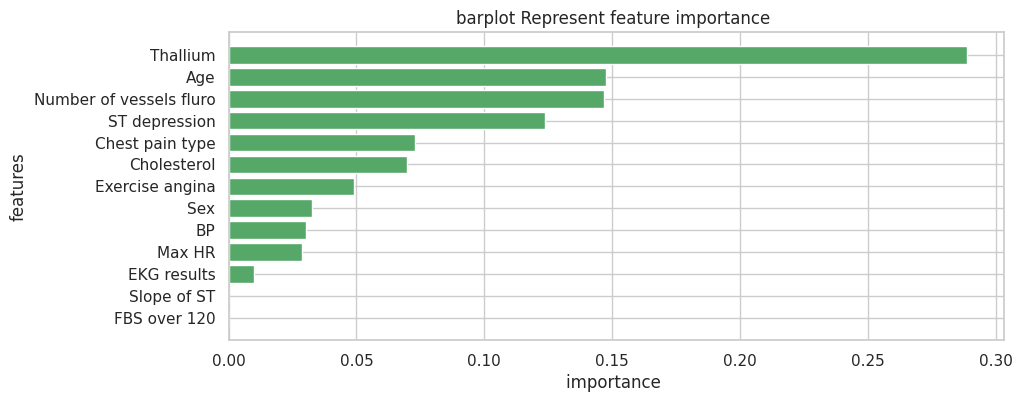

In [ ]:
imp_feature = pd.DataFrame({'Feature': ['Age', 'Sex','Chest pain type','BP','Cholesterol','FBS over 120',
    'EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro',
                                        'Thallium'], 'Importance': dtg.feature_importances_})
#sorting values stored to display top-most important features
imp_feature = imp_feature.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'g')
plt.show()

Thallium vs HeartDisease

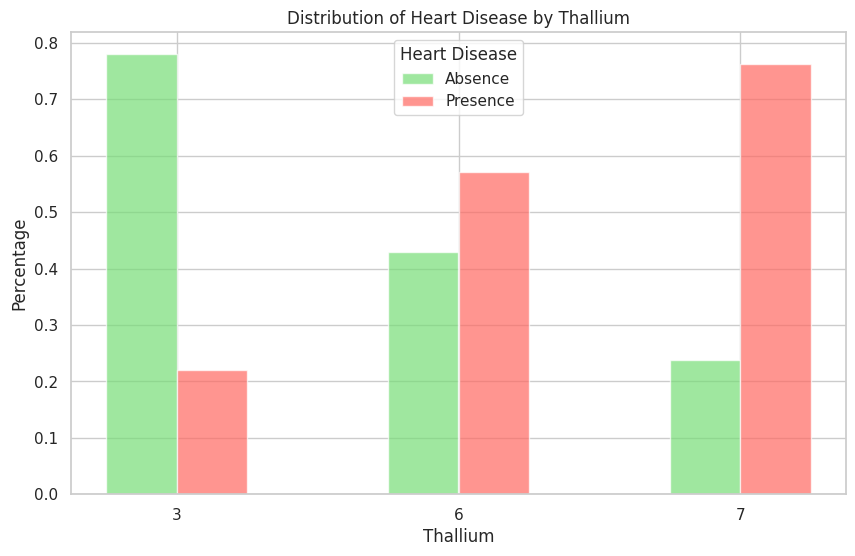

In [ ]:
cross_tab = pd.crosstab(df['Thallium'], df['Heart Disease'], normalize='index')
plt.figure(figsize=(10, 6))
thallium_values = cross_tab.index
bar_width = 0.25
bar_positions_absence = np.arange(len(thallium_values))
bar_positions_presence = bar_positions_absence + bar_width
#plotting the bars separately
plt.bar(bar_positions_absence, cross_tab[0], width=bar_width, color='#77dd77', alpha=0.7, label='Absence')
plt.bar(bar_positions_presence, cross_tab[1], width=bar_width, color='#ff6961', alpha=0.7, label='Presence')
plt.title('Distribution of Heart Disease by Thallium')
plt.xlabel('Thallium')
plt.ylabel('Percentage')
plt.xticks(bar_positions_absence + bar_width / 2, thallium_values)
plt.legend(title='Heart Disease')
plt.show()
